# Bootstrapped Seed Analysis
Here, the data gathered for inspecting the model's sensitivity to stochastics will be analyzed. This analysis will be more reliable as bootstrapping will be used to draw conclusions.

In [1]:
import pandas as pd
import os

from dmdu.exploration.seed_analysis_utils import get_data
from dmdu.exploration.seed_analysis_bootstrap_utils import load_outcomes, get_quantile_data, save_to_csv
from model.enums import BeliefUpdate

# Params
n_seeds_list = [10, 20, 30, 40, 50]
n_samplings_per_n_seeds = 100
quantile = 0.5


### Bootstrapping

In [2]:
outcomes_deffuant = load_outcomes(BeliefUpdate.DEFFUANT)
seed = None  # if want to have reproducible, set a seed. If want to see different samples, seed = None.

for belief_update_fn in list(BeliefUpdate):
    # Calculate quantile data
    data = get_quantile_data(outcomes_deffuant, n_seeds_list=n_seeds_list, n_samplings=n_samplings_per_n_seeds, quantile=quantile, seed=seed)
    # Save data
    save_to_csv(data=data, belief_update_fn=belief_update_fn)


### Loading the data

In [3]:
data_dict = {}

for belief_update_fn in list(BeliefUpdate):
    dir_path = os.path.join(os.getcwd(), 'data', 'seedanalysis', belief_update_fn.name)
    file_name =  'quantile.csv'
    path = os.path.join(dir_path, file_name)

    data = pd.read_csv(path)

    data_dict[belief_update_fn.name] = data

# for k, v in data_dict.items():
#     print(k, type(v))

### Plotting the results

In [4]:
data_dict['SAMPLE']

,Unnamed: 0,n_agents_above_belief_threshold,polarization_variance,engagement,free_speech_constraint,avg_user_effort,n_seeds
0,0.5,929.0,169.490,265.5975,0.212851,38.135,10
1,0.5,940.0,152.810,269.4105,0.194225,39.170,10
2,0.5,924.0,176.655,276.8565,0.220060,36.695,10
3,0.5,941.0,155.105,275.0625,0.195803,39.840,10
4,0.5,943.0,149.815,259.6510,0.189253,37.685,10
...,...,...,...,...,...,...,...
495,0.5,937.0,158.805,270.4340,0.202563,38.550,50
496,0.5,934.0,160.550,269.2075,0.203910,38.095,50
497,0.5,935.0,160.605,269.7995,0.204744,38.185,50
498,0.5,935.0,161.655,267.9065,0.203743,38.090,50


In [5]:
import matplotlib.pyplot as plt
import statistics
from math import sqrt
import seaborn as sns





In [6]:

def plot_1_metric(data, metric):

    sns.set_style('whitegrid')
    sns.set(rc={'figure.figsize': (10, 7)})
    plt.title(f'{bufn} – {metric}')
    g = sns.lineplot(data=data, x='n_seeds', y=metric)
    g.set_xticks(n_seeds_list)
    g.set_xticklabels(n_seeds_list)
    plt.show()


In [7]:
def plot_all_metrics(data_dict, belief_update_fn):

    metrics = data_dict[bufn].columns
    exclude = ['Unnamed: 0', 'n_seeds']
    metrics = [e for e in metrics if not e in exclude]

    for metric in metrics:
        plot_1_metric(data=data_dict[belief_update_fn], metric=metric)

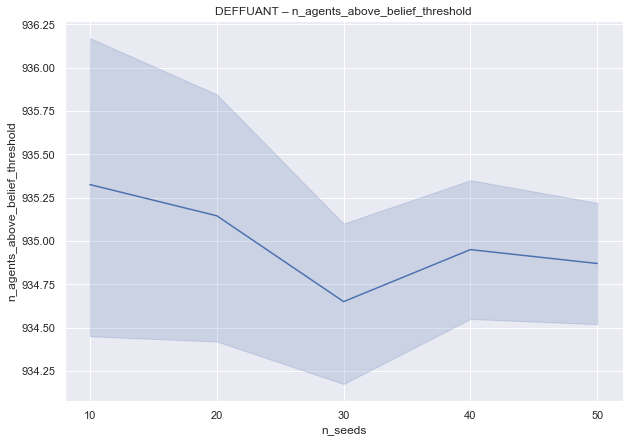

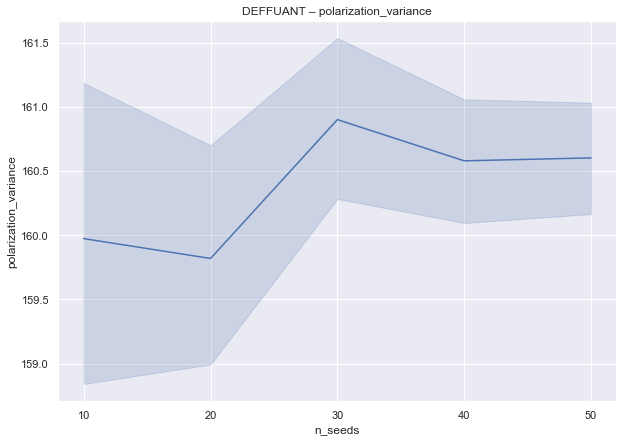

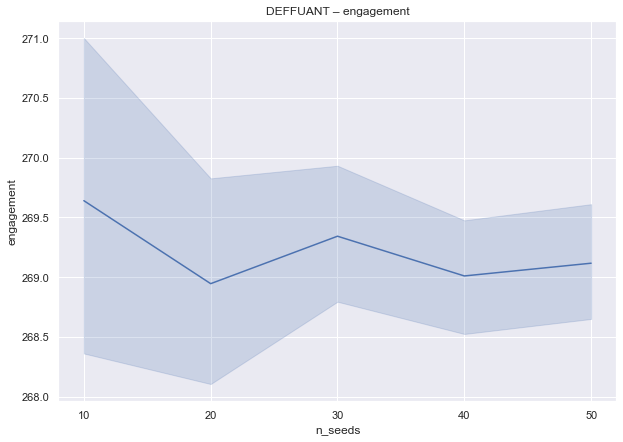

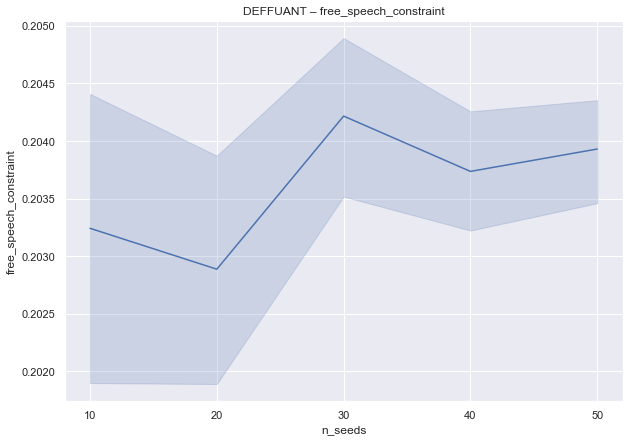

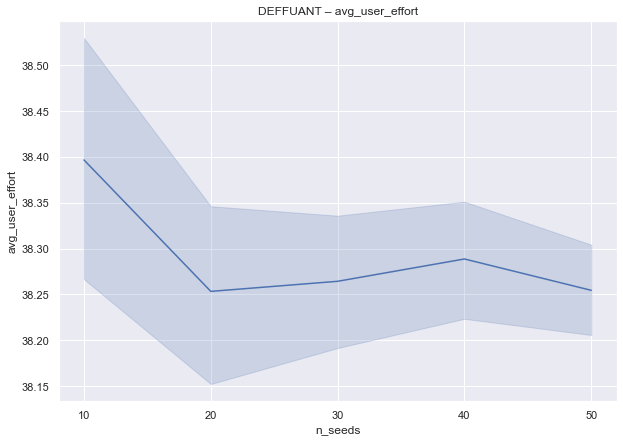

In [8]:
# Params
bufn = 'DEFFUANT'
plot_all_metrics(data_dict, bufn)


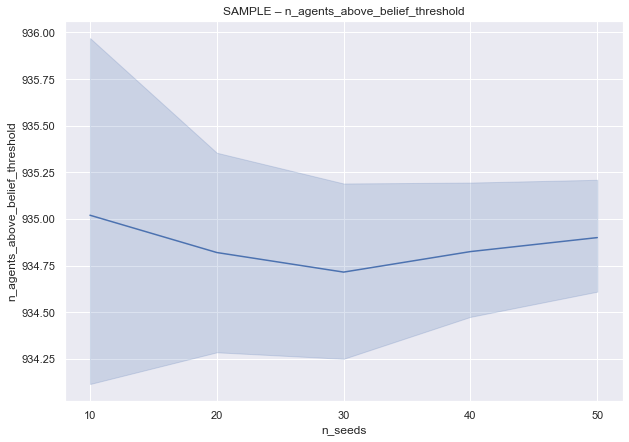

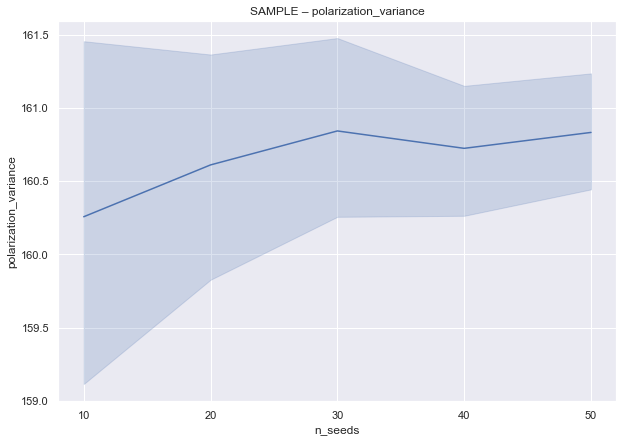

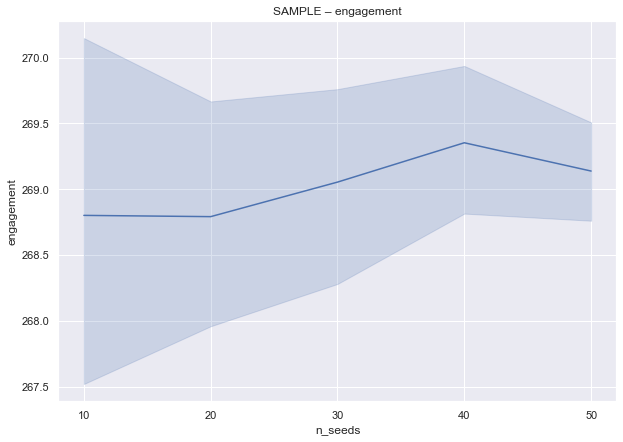

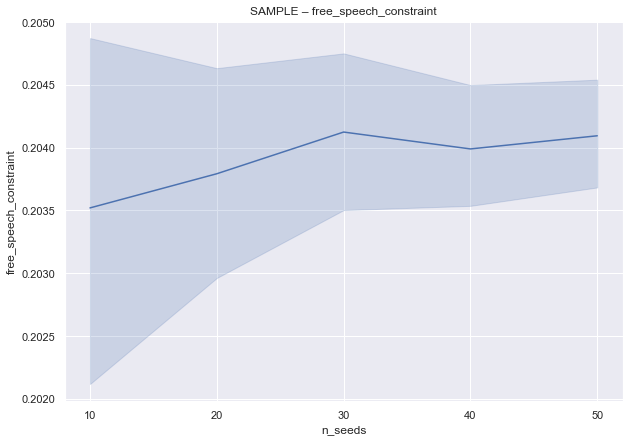

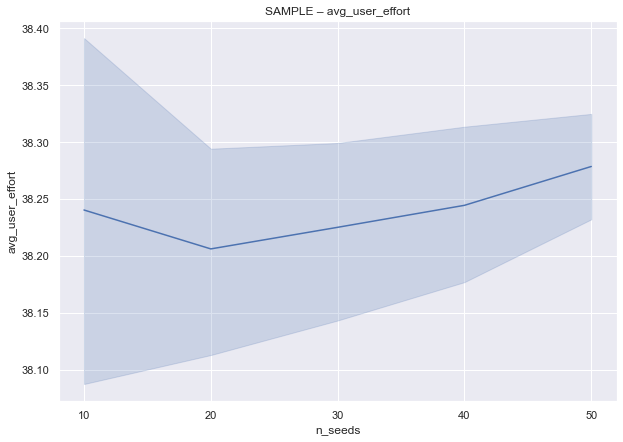

In [9]:
# Params
bufn = 'SAMPLE'

plot_all_metrics(data_dict, bufn)

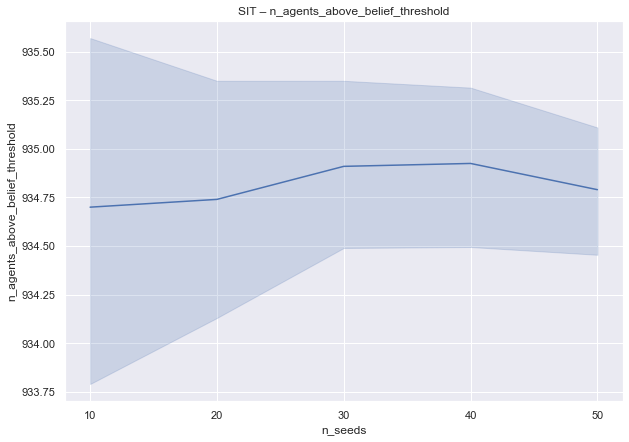

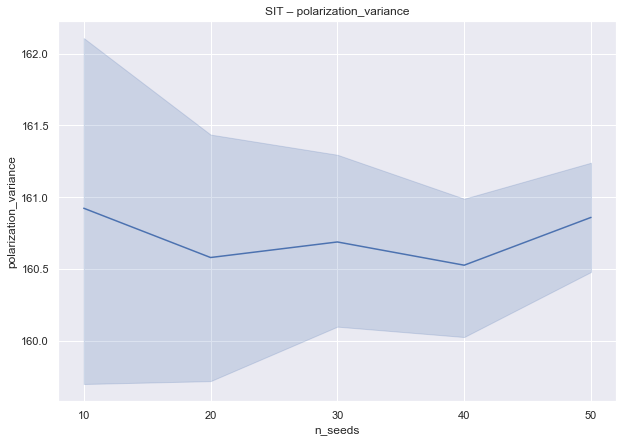

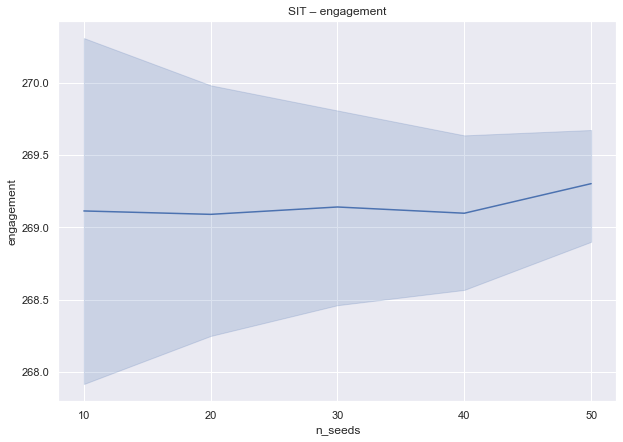

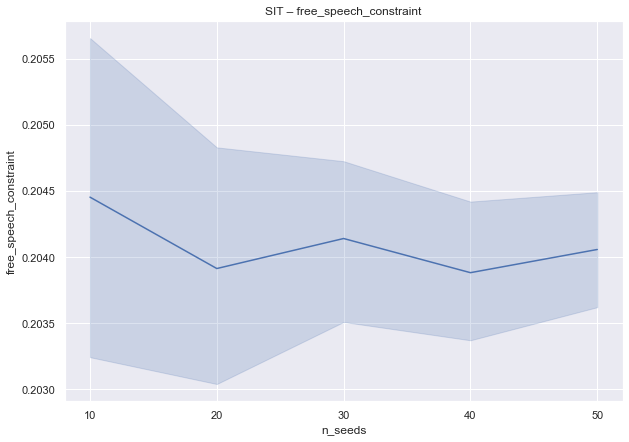

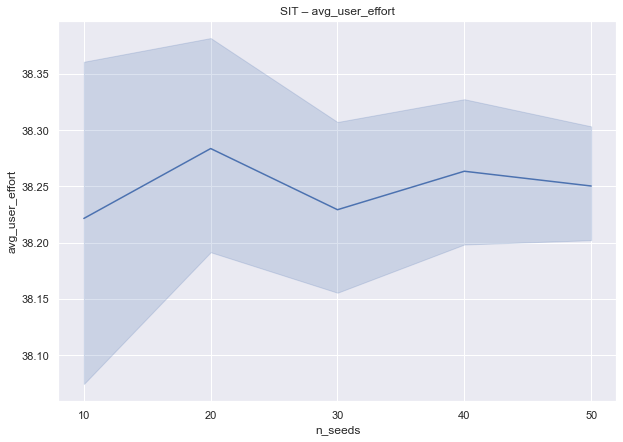

In [10]:
# Params
bufn = 'SIT'

# Plotting
plot_all_metrics(data_dict, bufn)

In [11]:
# # Started attempt at subplotting
# # - uses subplot code from belief_distribution_checks
#
# from matplotlib.offsetbox import AnchoredText
# from matplotlib.ticker import MaxNLocator
# # # Sample which runs to include in the plot
# # n_runs = len(data)
# # all_run_ids = [*range(n_runs)]
# # plot_ids = random.sample(all_run_ids, k=n_rows*n_cols)  # outside of model performance, can use non-model random
# n_rows = 3
# n_cols = 5
# y_ticks = 5
# x_ticks = 5
#
#
# # Create subplots
# # fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, sharex="all", sharey="all", figsize=(10.8, 8))
# fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, sharex="all", figsize=(10.8, 8))
#
# for row in range(n_rows):
#     for col in range(n_cols):
# #
# # for belief_update_fn in list(BeliefUpdate):
# #     for metric in data:
#         # # Plot 1 hist (incl. before & after)
#         # idx = plot_ids.pop()
#         # repl_data = data[idx]
#         # before, after = repl_data
#         # sns.histplot(data=before, color="skyblue", label="Before", kde=True, bins=25, binrange=(0, 100),
#         #              ax=axes[row, col])
#         # sns.histplot(data=after, color="red", label="After", kde=True, bins=25, binrange=(0, 100),
#         #              ax=axes[row, col])
#         # if y_max is not None:
#         #     plt.ylim(0, y_max)
#         # Plot 1 lineplot
#         g = sns.lineplot(data=data, x='n_seeds', y=metric)
#         g.set_xticks(n_seeds_list)
#         g.set_xticklabels(n_seeds_list)
#
#         # Depict information (labels etc)
#         # - replication number
#         # anc = AnchoredText(f'Run', loc="upper center", frameon=False)
#         # axes[row, col].add_artist(anc)
#         # - y axis
#         if col == 0:
#             axes[row, col].set_ylabel(belief_update_fn)
#             # axes[row, col].yaxis.set_major_locator(MaxNLocator(y_ticks))
#         # - x axis
#         if row == n_rows - 1:
#             axes[row, col].set_xlabel('n_seeds')
#             axes[row, col].xaxis.set_major_locator(MaxNLocator(x_ticks))
#         # - legend
#         if row == 0 and col == n_cols - 1:
#             axes[row, col].legend(fontsize='large', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
#
# # Title for whole plot
# # plt.suptitle(f"\n{title}", fontsize='x-large')
# plt.show()